# ONLY DATA FROM AFRICA EDA and ETL ##

#### IMPORTING DATA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./DataSets/linkedin-jobs-africa.csv')


## EDA (Exploratory Data Analysis)
#### * Part 1 - General #

In [ ]:
# Rows and Columns
print(f'\n - Number of rows is {df.shape[0]} and the numbers of columns is {df.shape[1]} \n')
# Column Names
a = list(df.columns.values)
print(f'- The column names are : {a} \n')
# Data Types
print(f'Column name: \t  datatype:')
print(df.dtypes)
# Describe
print(' \n')
print(f'-Describe \n\n {df.describe()} \n')
# Null Values
print(f' - Nulls\n\n{df.isna().sum()}')
# head 2
print(df.head())

## EDA (Exploratory Data Analysis)
####  * Part 2 - Particular and Graphics

#### *Unique values per column*

In [ ]:
print(f'\n This is a table showing unique values per column: \n')

table_uniques = pd.DataFrame({'unique': [df["title"].nunique(), df["company"].nunique(), df["description"].nunique(),
                              df["onsite_remote"].nunique(),df["salary"].nunique(), df["location"].nunique(),
                                df["criteria"].nunique(), df["posted_date"].nunique()]},
            
                  index=['title', 'company', 'description', 'onsite_remote', 'salary',
                         'location', 'criteria', 'posted_date'])
table_uniques


##### *We obtain the number of job positions focused on the three categories*
##### *-> Onsite|Remote|Hybrid*

In [ ]:
plt.figure(figsize=(4, 2)) # Adjusting the graphic size (4 x 2 inches)
c = sns.countplot(x='onsite_remote', data=df)
c.set_xlabel('Job Positions counts')
c.set_ylabel('Counts')
print('\n')
plt.show()

#### a. TOP 10 Companies that offer a greater number of job positions

In [ ]:
top_10 = df['company'].value_counts().head(10)
top_10_df = pd.DataFrame({'company': top_10.index, 'count': top_10.values})
plt.figure(figsize=(4, 2))
c = sns.barplot(y='company', x='count', data=top_10_df)
c.set_xlabel('Job Position Counts') # Capturamos el grafico para renombrarlo
c.set_ylabel('Companies')
print('\n')
plt.show()

#### b. TOP 10 Companies that offer a greater number of job positions in REMOTE 

In [ ]:
# Obtener el número de trabajos remotos para cada empresa
remote_jobs = df[df['onsite_remote'] == 'remote']['company'].value_counts()

# Obtener las 10 empresas con más trabajos remotos y ordenarlas por número de trabajos remotos
top_remote_companies = remote_jobs.head(10).sort_values(ascending=False)

# Crear un gráfico de barras horizontales que muestre el número de trabajos remotos por empresa
plt.figure(figsize=(4, 2)) # Definir el tamaño de la figura
colors = plt.cm.Set2(range(len(top_remote_companies))) # Colores diferentes para cada barra
plt.barh(top_remote_companies.index, top_remote_companies.values, color=colors)
plt.title('Top 10 Remote Companies')
plt.xlabel('Remote positions')
plt.ylabel('Companies')
plt.gca().invert_yaxis() # Invertir el orden de las empresas en el eje y
print('\n')
plt.show()



#### c. TOP 10 Companies that offer a greater number of job positions in ONSITE

In [ ]:
# Obtener el número de trabajos remotos para cada empresa
remote_jobs = df[df['onsite_remote'] == 'onsite']['company'].value_counts()

# Obtener las 10 empresas con más trabajos remotos y ordenarlas por número de trabajos remotos
top_remote_companies = remote_jobs.head(10).sort_values(ascending=False)

# Crear un gráfico de barras horizontales que muestre el número de trabajos remotos por empresa
plt.figure(figsize=(4, 2)) # Definir el tamaño de la figura
colors = plt.cm.Set2(range(len(top_remote_companies))) # Colores diferentes para cada barra
plt.barh(top_remote_companies.index, top_remote_companies.values, color=colors)
plt.title('Top 10 ONSITE Companies')
plt.xlabel('Onsite positions')
plt.ylabel('Companies')
plt.gca().invert_yaxis() # Invertir el orden de las empresas en el eje y
print('\n')
plt.show()

#### d. TOP 10 Companies that offer a greater number of job positions in HYBRID

In [ ]:
# Obtener el número de trabajos remotos para cada empresa
remote_jobs = df[df['onsite_remote'] == 'hybrid']['company'].value_counts()

# Obtener las 10 empresas con más trabajos remotos y ordenarlas por número de trabajos remotos
top_remote_companies = remote_jobs.head(10).sort_values(ascending=False)

# Crear un gráfico de barras horizontales que muestre el número de trabajos remotos por empresa
plt.figure(figsize=(4, 2)) # Definir el tamaño de la figura
colors = plt.cm.Set2(range(len(top_remote_companies))) # Colores diferentes para cada barra
plt.barh(top_remote_companies.index, top_remote_companies.values, color=colors)
plt.title('Top 10 HYBRID Companies')
plt.xlabel('Onsite positions')
plt.ylabel('Companies')
plt.gca().invert_yaxis() # Invertir el orden de las empresas en el eje y
print('\n')
plt.show()

## ETL (Extract, Transform and Load)

#### *DATE*

In [3]:
df['posted_date'].unique()
df['posted_date'] = pd.to_datetime(df['posted_date'], format='%Y-%m-%d')
print(df.dtypes)

title                    object
company                  object
description              object
onsite_remote            object
salary                  float64
location                 object
criteria                 object
posted_date      datetime64[ns]
link                     object
dtype: object


In [4]:
df['posted_date'] = pd.to_datetime(df['posted_date'])
df.groupby(df['posted_date'].dt.month).count()


,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
posted_date,,,,,,,,,
8,3,3,3,3,0,3,3,3,3
9,36,36,36,36,0,36,36,36,36
10,687,687,687,687,0,687,687,687,687
11,2146,2146,2146,2146,0,2146,2146,2146,2146


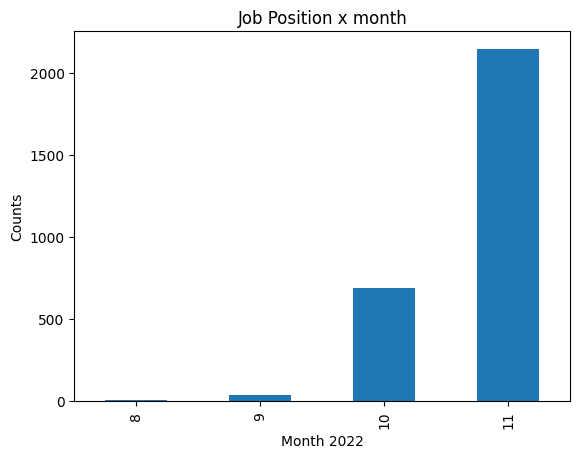

In [6]:

import matplotlib.pyplot as plt

df['posted_date'] = pd.to_datetime(df['posted_date'])
df['posted_date'].dt.month.value_counts().sort_index().plot(kind='bar')
plt.xlabel('Month 2022')
plt.ylabel('Counts')
plt.title('Job Position x month')
plt.show()



# Haciendo un analisis y ETL para Paises

In [ ]:
# Extraemos de la columna location en otra columna llamada 'country' los paises que estan escritos 
# luego de la coma para una dividion n=1
df['country'] = df['location'].str.rsplit(',', n=1, expand=True)[1].str.strip()
# Si no encuentra comas agrega todo el valor a la nueva columna country
df.loc[df['country'].isna(), 'country'] = df['location'].str.strip()
df.tail(50)


In [ ]:
# Aqui observamos la cantidad de valores que existe en la columna country
unique_countries = df['country'].unique().tolist()
unique_countries # Observamos que hay 2 que no son un pais estrictamente 'Johannesburg Metropolitan Area' y 'Eastern Africa'

In [ ]:
# Reemplazamos el valor Johannesburg Metropolitan Area con el de su pais
# Respecto a Eastern Africa, lo analizaremos de esta manera
df['country'] = df['country'].replace('Johannesburg Metropolitan Area', 'South Africa')


In [ ]:
# Volvemos a contar los valores que ahora existen en 'country'
unique_countries = df['country'].unique().tolist()
unique_countries

In [ ]:
# Con esta informacion tenemos info sobre cuantos puestos de trabajo se han lanzado por pais

country_counts = df['country'].value_counts().sort_values(ascending=False)

# Crear el gráfico utilizando los valores ordenados
c = sns.countplot(y='country', data=df, order=country_counts.index)

c.set_xlabel('Cantidad de ofertas de trabajo')
c.set_ylabel('Pais')
plt.show()


# Haciendo un ETL a la columna de criterio

In [ ]:
df.tail(4)

In [ ]:
unique_countries = df['criteria'].unique().tolist()
len(unique_countries)

In [ ]:
import langid
from googletrans import Translator

translator = Translator()

def translate_if_arabic(text):
    try:

        lang, _ = langid.classify(text)
        if lang == 'ar':
            return translator.translate(text, dest='en').text
        else:
            return text
    except: 
        print(text)
# Aplicamos la función a la columna 'nombre_columna'

df['criteria_english'] = df['criteria'].apply(translate_if_arabic)


In [ ]:
import langdetect

# Supongamos que tienes una columna llamada 'texto'
idiomas_detectados = df['criteria'].apply(lambda x: langdetect.detect_langs(x)[0].lang).unique()

print(idiomas_detectados)


In [ ]:
# Aqui veremos la columna de criteria

import ast
ast.literal_eval(df['criteria'][0])